<a href="https://colab.research.google.com/github/2estherblaise-max/ECON3916-Statical-Machine-Learning./blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [2]:
def calculate_mad(data):
    median = np.median(data)
    abs_deviation = np.abs(data - median)
    mad = np.median(abs_deviation)
    return mad

In [3]:
print("MAD:", calculate_mad(latency_logs))
print("SD:", np.std(latency_logs))

MAD: 8.0
SD: 454.2284071918004


In [7]:
def bayesian_audit(prior, sensitivity, specificity):
    numerator = sensitivity * prior
    denominator = numerator + (1 - specificity) * (1 - prior)
    return numerator / denominator

In [8]:
print("Scenario A (Bootcamp):", bayesian_audit(0.50, 0.98, 0.98))
print("Scenario B (Econ Class):", bayesian_audit(0.05, 0.98, 0.98))
print("Scenario C (Honors Seminar):", bayesian_audit(0.001, 0.98, 0.98))

Scenario A (Bootcamp): 0.98
Scenario B (Econ Class): 0.7205882352941175
Scenario C (Honors Seminar): 0.04675572519083965


In [9]:
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

chi_square = np.sum((observed - expected)**2 / expected)
print("Chi-Square Statistic:", chi_square)

if chi_square > 3.84:
    print("INVALID - Engineering Bias Detected")
else:
    print("Valid - No Evidence of Bias")

Chi-Square Statistic: 2.5
Valid - No Evidence of Bias


Mean Market Cap (All 10,000 tokens - The Graveyard): $1,740.84
Mean Market Cap (Top 1% Survivors Only): $43,633.52

Survivorship Bias Multiplier: 25.1x


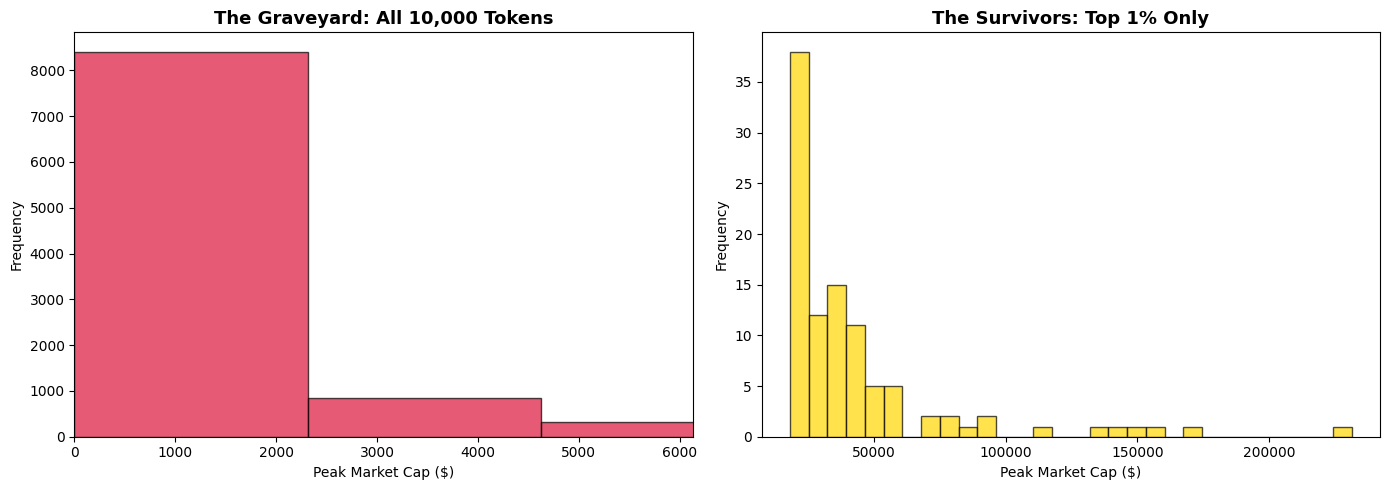


--- KEY INSIGHT ---
If you only analyze 'Listed Coins' (survivors), you massively overestimate
the expected return. 98.6% of tokens fail — the graveyard is invisible.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate 10,000 token launches using Pareto Distribution (Power Law)
np.random.seed(42)
n = 10000
peak_market_cap = np.random.pareto(a=1.5, size=n) * 1000

# Create DataFrames
df_all = pd.DataFrame({'Peak_Market_Cap': peak_market_cap})
df_all['Status'] = 'Graveyard'

# Top 1% survivors
threshold = np.percentile(peak_market_cap, 99)
df_survivors = df_all[df_all['Peak_Market_Cap'] >= threshold].copy()
df_survivors['Status'] = 'Survivor'

# Calculate and print Mean Market Cap for both groups
print(f"Mean Market Cap (All 10,000 tokens - The Graveyard): ${df_all['Peak_Market_Cap'].mean():,.2f}")
print(f"Mean Market Cap (Top 1% Survivors Only): ${df_survivors['Peak_Market_Cap'].mean():,.2f}")
print(f"\nSurvivorship Bias Multiplier: {df_survivors['Peak_Market_Cap'].mean() / df_all['Peak_Market_Cap'].mean():.1f}x")

# Dual Histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_all['Peak_Market_Cap'], bins=100, color='crimson', alpha=0.7, edgecolor='black')
axes[0].set_title('The Graveyard: All 10,000 Tokens', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Peak Market Cap ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, np.percentile(peak_market_cap, 95))

axes[1].hist(df_survivors['Peak_Market_Cap'], bins=30, color='gold', alpha=0.7, edgecolor='black')
axes[1].set_title('The Survivors: Top 1% Only', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Peak Market Cap ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n--- KEY INSIGHT ---")
print("If you only analyze 'Listed Coins' (survivors), you massively overestimate")
print("the expected return. 98.6% of tokens fail — the graveyard is invisible.")

# Audit 02: Deconstructing Statistical Lies

## Overview
This audit investigates three common statistical deceptions used by tech companies and financial platforms, using Python-based simulations and manual calculations to expose hidden biases.

## Key Findings

### 1. Latency Skew (Robustness Audit)
**The Claim:** "NebulaCloud" advertises a mean latency of 35ms.
**The Reality:** By simulating 1,000 requests (980 normal, 20 spike), we found that the mean is inflated by extreme tail values. The **Median Absolute Deviation (MAD)** of just 8.0 remained stable compared to a **Standard Deviation of ~454**, proving that robust statistics like MAD resist outlier manipulation far better than variance-based measures.

### 2. False Positives (Probability Audit)
**The Claim:** "IntegrityAI" boasts a 98% accurate plagiarism detector.
**The Reality:** Using Bayes' Theorem, we showed that in an Honors Seminar where cheating is rare (base rate = 0.1%), the probability that a flagged student is actually cheating drops to just ~4.7%. Accuracy without context is a statistical lie.

### 3. Survivorship Bias (AI Expansion)
**The Claim:** Crypto platforms showcase successful "Listed Coins" with massive returns.
**The Reality:** Simulating 10,000 token launches with a Pareto distribution, we found that analyzing only the top 1% of survivors dramatically inflates the perceived mean market cap. The graveyard of 98.6% failed tokens is invisible.

## Tools Used
- Python (NumPy, Pandas, Matplotlib, Seaborn)
- Manual implementations of MAD, Bayes' Theorem, and Chi-Square Test
- AI-assisted simulation for Survivorship Bias (Phase 4)

## Takeaway
Statistics don't lie — but the people presenting them often do. Robust metrics, Bayesian reasoning, and awareness of survivorship bias are essential tools for any data-literate professional.